![](https://img.kaikeba.com/web/kkb_index/img_index_logo.png)

# Lesson-02 Assignment

   本周课程主要包含了图像基本操作中的卷积/滤波，以及最基础的特征描述算法————Harris Corner和SIFT。希望大家认真复习，理解图像求导/卷积的目的，以及特征的本质。
   本次作业分为阅读部分和算法部分。

## 本次作业的内容

### [Reading]:

You needn't finish reading all of them in just one week!
It's just good for you to know what's happening in this area and to figure out how people try to improve SIFT.

You needn't to remember all of them. 
But please DO REMEMBER procedures of SIFT and HoG. For those who're interested in SLAM, Orb is your inevitable destiny.

1. [optional] Bilateral Filter: https://blog.csdn.net/piaoxuezhong/article/details/78302920
2. Feature Descriptors:
   [Compulsory]
   Hog: https://lear.inrialpes.fr/people/triggs/pubs/Dalal-cvpr05.pdf
   SURF: https://www.vision.ee.ethz.ch/~surf/eccv06.pdf
   [optional]
   BRISK: http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.371.1343&rep=rep1&type=pdf
   Orb: http://www.willowgarage.com/sites/default/files/orb_final.pdf [Compulsory for SLAM Guys]
3. Preview parts:
   K-Means: I have no doubts about what you are going to read and where you gonna find the reading materials. There are tons of papers/blogs describing k-means. Just grab one and read.We'll talk about this topic in 3 weeks.

### [Coding]:
Finish 2D convolution/filtering by your self. 
What you are supposed to do can be described as "median blur", which means by using a sliding window on an image, your task is not going to do a normal convolution, but to find the median value within that crop.

You can assume your input has only one channel. (a.k.a a normal 2D list/vector) And you do need to consider the padding method and size. There are 2 padding ways: REPLICA & ZERO. When "REPLICA" is given to you, the padded pixels are same with the border pixels. E.g is [1 2 3] is your image, the padded version will be  [[(...1 1) 1 2 3 (3 3...)]  where how many 1 & 3 in the parenthesis depends on your padding size. When "ZERO", the padded version will be [(...0 0) 1 2 3 (0 0...)]

Assume your input's size of the image is W x H, kernel size's m x n. You may first complete a version with O(W·H·m·n log(m·n)) to O(W·H·m·n·m·n)).

Follow up 1: Can it be completed in a shorter time complexity?

In [149]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [163]:
img = cv2.imread('lenna.jpg',1)

In [164]:
def myshow(img):
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

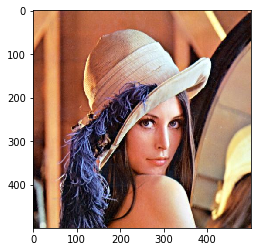

In [165]:
myshow(img)

In [178]:
b, g, r = cv2.split(img)

In [179]:
def medianBlur(img, kernel, padding_way):
#        img & kernel is List of List; padding_way a string
#        Please finish your code under this blank
    img_input = img
    W = img_input.shape[0]
    H = img_input.shape[1]
    kernel_input = np.zeros(kernel)
    k_size = kernel[0]
    w = W - k_size + 1
    h = H - k_size + 1
    new_img_1 = np.zeros((w,h)).astype(np.uint8)
    for i in range(w):
        for j in range(h):
            new_img_1[j,i] = np.median(img[j:j+k_size,i:i+k_size])
    if padding_way == 'REPLICA':
        img_medianBlur = np.pad(new_img_1, pad_width = (W-w)//2, mode = 'edge')
    if padding_way == 'ZERO':
        img_medianBlur = np.pad(nwe_img_1, pad_width = (W-w)//2, mode='constant', constant_values=0)
    return img_medianBlur

In [188]:
img_b = medianBlur(b, kernel = [30,30], padding_way = 'REPLICA')
img_g = medianBlur(g, kernel = [30,30], padding_way = 'REPLICA')
img_r = medianBlur(r, kernel = [30,30], padding_way = 'REPLICA')

In [207]:
img_m = cv2.merge([img_b,img_g,img_r])

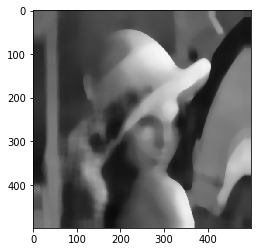

In [208]:
myshow(img_b)

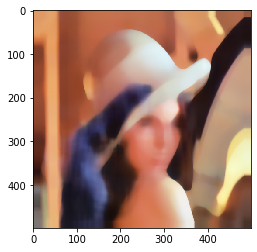

In [209]:
myshow(img_m)

### [Reading + Pseudo Code]:
We haven't told RANSAC algorithm this week. So please try to do the reading.

And now, we can describe it here:
    We have 2 sets of points, say, Points A and Points B. We use A.1 to denote the first point in A, B.2 the 2nd point in B and so forth. Ideally, A.1 is corresponding to B.1, ... A.m corresponding B.m. However, it's obvious that the matching cannot be so perfect and the matching in our real world is like: 
    A.1-B.13, A.2-B.24, A.3-x (has no matching), x-B.5, A.4-B.24(This is a wrong matching) ...
    The target of RANSAC is to find out the true matching within this messy.
    
Algorithm for this procedure can be described like this:
    1. Choose 4 pair of points randomly in our matching points. Those four called "inlier" (中文： 内点) while others "outlier" (中文： 外点)
    2. Get the homography of the inliers
    3. Use this computed homography to test all the other outliers. And separated them by using a threshold into two parts:
        a. new inliers which is satisfied our computed homography
        b. new outliers which is not satisfied by our computed homography.
    4. Get our all inliers (new inliers + old inliers) and goto step 2
    5. As long as there's no changes or we have already repeated step 2-4 k, a number actually can be computed, times, we jump out of the recursion. The final homography matrix will be the one that we want.

[WARNING!!! RANSAC is a general method. Here we add our matching background to that.]

Your task: please complete pseudo code (it would be great if you hand in real code!) of this procedure.

Python:
def ransacMatching(A, B):
    A & B: List of List

Follow up 1. For step 3. How to do the "test“? Please clarify this in your code/pseudo code
Follow up 2. How do decide the "k" mentioned in step 5. Think about it mathematically!

You are supposed to hand in the code in 1 week.

# RANSAC伪代码：
iterations = 0

best_model = null

best_consensus_set = null

best_error = 无穷大

while ( iterations < k )

maybe_inliers = 从数据集中随机选择n个点

maybe_model = 适合于maybe_inliers的模型参数

consensus_set = maybe_inliers

for ( 每个数据集中不属于maybe_inliers的点 ）

if ( 如果点适合于maybe_model，且错误小于t ）

将点添加到consensus_set

if （ consensus_set中的元素数目大于d ）

已经找到了好的模型，现在测试该模型到底有多好

better_model = 适合于consensus_set中所有点的模型参数

this_error = better_model究竟如何适合这些点的度量

if ( this_error < best_error )

我们发现了比以前好的模型，保存该模型直到更好的模型出现

best_model =  better_model

best_consensus_set = consensus_set

best_error =  this_error

增加迭代次数

返回 best_model, best_consensus_set, best_error

————————————————
版权声明：本文为CSDN博主「robinhjwy」的原创文章，遵循 CC 4.0 BY-SA 版权协议，转载请附上原文出处链接及本声明。
原文链接：https://blog.csdn.net/robinhjwy/article/details/79174914

### [作业截止时间]

作业能帮助你回顾课堂内容，你又可以通过作业进行代码实操。咱们可要认真、及时的完成作业哦！自布置作业起两周内提交，助教及时批改作业哦～逾期提交不批改。（特殊情况，请找班主任请假。）

这次的作业就到这里了！祝大家学习进步！

![image alt <](http://5b0988e595225.cdn.sohucs.com/images/20190420/1d1070881fd540db817b2a3bdd967f37.gif)